<a href="https://colab.research.google.com/github/JorgeAccardi/portafolio/blob/main/An%C3%A1lisis_y_predicci%C3%B3n_de_Fuga_de_Clientes_en_Telecomunicaciones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análisis y Predicción de Fuga de Clientes en Telecomunicaciones

## Introducción

La fuga de clientes (conocida como *churn*) es uno de los desafíos más significativos que enfrentan las empresas en la industria de las telecomunicaciones. Perder un cliente no solo implica la pérdida de ingresos recurrentes de ese cliente, sino también el costo asociado a la adquisición de uno nuevo, que suele ser considerablemente mayor. Por lo tanto, predecir qué clientes son propensos a **fugarse** y entender los motivos detrás de su decisión es crucial para implementar estrategias de retención efectivas y optimizar los recursos de marketing.

En esta práctica, nos sumergiremos en un análisis de datos real para abordar este problema.

## Objetivo de la Práctica

El propósito de este cuaderno es realizar un análisis completo del problema de fuga de clientes:
1.  **Análisis Exploratorio de Datos (EDA):** Comprender las características de los clientes y cómo se relacionan con la fuga.
2.  **Preprocesamiento de Datos:** Preparar los datos para la construcción de modelos predictivos.
3.  **Modelado Predictivo:** Construir y evaluar un modelo de Machine Learning capaz de predecir la probabilidad de que un cliente se fugue.
4.  **Interpretación de Resultados:** Extraer conclusiones accionables que ayuden a la empresa a reducir la tasa de fuga.

## Dataset

Utilizaremos el dataset **Telco Customer Churn**, un conjunto de datos público y representativo, disponible en Kaggle. Contiene información demográfica de los clientes, los servicios a los que están suscritos y su estado respecto a la fuga.

## Herramientas

Trabajaremos en **Google Colab**, utilizando las librerías estándar de Python para análisis de datos y Machine Learning:
* **Pandas:** Para manipulación y análisis de datos estructurados.
* **NumPy:** Para operaciones numéricas de alto rendimiento.
* **Matplotlib y Seaborn:** Para visualización de datos.
* **Scikit-learn:** Para preprocesamiento de datos, selección de modelos y evaluación.

¡Comencemos a configurar nuestro entorno!

## 1. Configuración del Entorno e Importación de Librerías

El primer paso en cualquier proyecto de análisis de datos es preparar nuestro espacio de trabajo. Esto implica importar todas las librerías de Python que necesitaremos a lo largo del análisis. Cada librería cumple una función específica, desde la carga y manipulación de datos hasta la creación de visualizaciones y la implementación de modelos de Machine Learning.

A continuación, importaremos las librerías esenciales.

In [1]:
# Importar librerías necesarias
import pandas as pd # Manipulación y análisis de datos
import numpy as np  # Soporte para arrays y operaciones numéricas

# Librerías para visualización de datos
import matplotlib.pyplot as plt
import seaborn as sns

# Librerías de Scikit-learn para preprocesamiento y modelado
from sklearn.model_selection import train_test_split # Para dividir datos en conjuntos de entrenamiento y prueba
from sklearn.preprocessing import StandardScaler, OneHotEncoder # Para escalar y codificar datos
from sklearn.compose import ColumnTransformer # Para aplicar transformaciones a diferentes columnas

# Para construir pipelines de preprocesamiento y modelado
from sklearn.pipeline import Pipeline

# Modelos de clasificación a considerar (empezaremos con uno simple)
from sklearn.linear_model import LogisticRegression
# Podemos añadir otros modelos aquí para probar más adelante, como:
# from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# Métricas para evaluar el rendimiento del modelo
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve

# Para ignorar advertencias (opcional, útil en notebooks)
import warnings
warnings.filterwarnings('ignore')

# Configurar matplotlib para mostrar gráficos en el notebook
%matplotlib inline

print("Librerías importadas correctamente.")

Librerías importadas correctamente.


## 2. Carga y Comprensión Inicial de los Datos

Una vez que tenemos nuestras herramientas listas, el siguiente paso es cargar el dataset con el que trabajaremos. En Google Colab, hay varias formas de cargar datos, siendo las más comunes:
1.  **Subir el archivo:** Cargar el archivo CSV directamente desde tu computadora a la sesión temporal de Colab. (Útil para archivos pequeños o cuando no se usa Kaggle API/Drive).
2.  **Desde Google Drive:** Montar tu Google Drive y acceder al archivo si lo tienes almacenado allí.
3.  **Desde una URL:** Si el dataset está alojado en una URL pública (como un repositorio de GitHub).
4.  **Usando Kaggle API:** Descargar datasets directamente desde Kaggle si tienes una cuenta y la API configurada.

Para esta práctica, asumiremos que tienes el archivo `WA_Fn-UseC_-Telco-Customer-Churn.csv` disponible. Si lo descargas de Kaggle, generalmente estará dentro de una carpeta con el mismo nombre del dataset.

Después de cargar los datos, es fundamental realizar una *comprensión inicial* del dataset. Esto implica inspeccionar las primeras filas, conocer el tipo de datos de cada columna, identificar posibles valores nulos y obtener estadísticas descriptivas básicas. Estos pasos nos dan una primera idea de la estructura, el contenido y la calidad de los datos.

In [3]:
# ---- Opción de Carga (Elige una) ----
# Si has subido el archivo manualmente a la sesión de Colab:
# file_name = 'WA_Fn-UseC_-Telco-Customer-Churn.csv'
# df = pd.read_csv(file_name)

# Si el archivo está en tu Google Drive (ajusta la ruta):
# from google.colab import drive
# drive.mount('/content/drive')
# file_path = '/content/drive/My Drive/ruta_a_tu_dataset/WA_Fn-UseC_-Telco-Customer-Churn.csv'
# df = pd.read_csv(file_path)

# Si usaste Kaggle API para descargarlo (ver sección anterior si no lo hiciste):
# Asegúrate de que la ruta sea correcta si está dentro de una carpeta
file_path = '/content/WA_Fn-UseC_-Telco-Customer-Churn.csv'
try:
    df = pd.read_csv(file_path)
    print("Dataset cargado exitosamente.")
except FileNotFoundError:
    print(f"Error: El archivo no se encuentra en '{file_path}'.")
    print("Por favor, verifica la ruta del archivo o si el archivo ha sido subido/descargado correctamente.")
    # Si no se encuentra, puedes descomentar las opciones de carga manual o desde Drive.
    # df = None # O manejar la ausencia del dataframe adecuadamente


# Si el DataFrame se cargó, proceder con la inspección inicial
if df is not None:
    # Mostrar las primeras 5 filas para entender la estructura y los datos
    print("\n--- Primeras 5 filas del Dataset ---")
    print(df.head())

    # Mostrar información general: nombres de columnas, tipos de datos, valores no nulos
    print("\n--- Información del Dataset (df.info()) ---")
    df.info()

    # Mostrar estadísticas descriptivas para columnas numéricas
    # describe() es útil para entender la distribución, rango, media, etc.
    print("\n--- Estadísticas Descriptivas (df.describe()) ---")
    print(df.describe())

    # Mostrar estadísticas descriptivas para columnas categóricas (incluye la variable objetivo inicial)
    print("\n--- Estadísticas Descriptivas para Variables Categóricas (df.describe(include='object')) ---")
    print(df.describe(include='object'))

    # Verificar el tamaño del dataset (número de filas y columnas)
    print(f"\n--- Dimensiones del Dataset ---")
    print(f"El dataset tiene {df.shape[0]} filas y {df.shape[1]} columnas.")

    # Verificar si hay duplicados (aunque no es común en este tipo de datasets, es buena práctica)
    print(f"\n--- Conteo de Filas Duplicadas ---")
    print(f"Número de filas duplicadas: {df.duplicated().sum()}")

Dataset cargado exitosamente.

--- Primeras 5 filas del Dataset ---
   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               N

## 3. Limpieza y Preprocesamiento de Datos

La fase de limpieza y preprocesamiento de datos es esencial para asegurar la calidad de nuestro análisis y preparar los datos en un formato adecuado para los algoritmos de Machine Learning. Basado en nuestra inspección inicial (`df.info()`, `df.describe()`), identificamos varios puntos que necesitan atención:

1.  **Columna `customerID`:** Es un identificador único por cliente y no aporta información predictiva para el modelo general. Debe ser eliminada.
2.  **Columna `TotalCharges`:** Fue leída como tipo `object` (cadena de texto) por Pandas en lugar de numérica. Esto casi siempre indica la presencia de caracteres no numéricos, comúnmente espacios en blanco en datasets exportados. Debemos convertirla a numérica y manejar los valores resultantes que puedan ser nulos.
3.  **Valores Nulos:** Debemos verificar la existencia de valores faltantes después de corregir `TotalCharges` y decidir cómo manejarlos (eliminación de filas, imputación).
4.  **Variables Categóricas:** La mayoría de nuestras variables (excepto `tenure`, `MonthlyCharges`, `TotalCharges`) son categóricas (`object` o binarias representadas como `object`). Los algoritmos de Machine Learning generalmente requieren que las variables de entrada sean numéricas. Necesitaremos codificarlas adecuadamente.
5.  **Variable Objetivo `Churn`:** Nuestra variable objetivo también es categórica ('Yes', 'No'). Debe ser convertida a un formato numérico binario (0 o 1).

Abordaremos estos puntos paso a paso.

In [4]:
# 3.1 Eliminar la columna 'customerID'
# axis=1 indica que es una columna, inplace=True modifica el DataFrame directamente
df = df.drop('customerID', axis=1)
print("Columna 'customerID' eliminada.")
print(f"Dimensiones actuales del dataset: {df.shape}")

# 3.2 Convertir la columna 'TotalCharges' a tipo numérico y manejar errores
# Primero, reemplazar los espacios en blanco con NaN (Not a Number)
df['TotalCharges'] = df['TotalCharges'].replace(' ', np.nan)

# Convertir la columna a tipo numérico (float). 'coerce' hará que los valores que no se puedan convertir sean NaN.
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

print("\n'TotalCharges' convertida a numérico. Espacios en blanco ahora son NaN.")

# 3.3 Manejar valores nulos
# Verificar cuántos valores nulos hay en cada columna después de la conversión de TotalCharges
print("\n--- Conteo de valores nulos por columna después de convertir TotalCharges ---")
print(df.isnull().sum())

# Observamos que 'TotalCharges' tiene algunos valores nulos.
# Estrategias comunes: eliminar filas, imputar con media, mediana, o un valor constante.
# Dado que son pocos valores nulos en comparación con el tamaño total del dataset (~0.1%),
# y para evitar perder información de otras columnas en esas filas, imputaremos.
# La mediana es a menudo preferible a la media si la distribución es asimétrica o hay outliers.
median_total_charges = df['TotalCharges'].median()
df['TotalCharges'].fillna(median_total_charges, inplace=True)

print(f"\nValores nulos en 'TotalCharges' imputados con la mediana ({median_total_charges:.2f}).")

# Verificar que ya no hay nulos
print("\n--- Conteo de valores nulos después de imputación ---")
print(df.isnull().sum().sum()) # Suma total de nulos en todo el DataFrame

# 3.4 Codificar la variable objetivo 'Churn'
# Convertir 'Yes' a 1 y 'No' a 0
df['Churn'] = df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

print("\nVariable objetivo 'Churn' codificada a 0s y 1s.")
print("Distribución de Churn (0: No Fuga, 1: Fuga):")
print(df['Churn'].value_counts())
print(f"Porcentaje de Fuga (Churn=1): {df['Churn'].value_counts(normalize=True)[1]*100:.2f}%")

# 3.5 Identificar variables por tipo para el preprocesamiento
# Separar columnas numéricas y categóricas para aplicar diferentes transformaciones
# Excluir la variable objetivo 'Churn' de las características
numerical_features = df.select_dtypes(include=np.number).columns.tolist()
numerical_features.remove('Churn') # Eliminar 'Churn' de la lista de numéricas

# Las variables categóricas son las de tipo 'object'
categorical_features = df.select_dtypes(include='object').columns.tolist()

print(f"\nCaracterísticas Numéricas identificadas: {numerical_features}")
print(f"Características Categóricas identificadas: {categorical_features}")

# 3.6 Configurar el pipeline de preprocesamiento
# Usaremos ColumnTransformer para aplicar diferentes transformaciones a diferentes columnas.
# - Escalar (StandardScaler) variables numéricas: Esto es importante para muchos algoritmos
#   que son sensibles a la escala de los datos (ej: Regresión Logística, SVMs, métodos basados en distancia).
#   Centra los datos en 0 con una desviación estándar de 1.
# - Codificar (OneHotEncoder) variables categóricas: Convierte variables categóricas nominales
#   en un formato binario. Cada categoría se convierte en una nueva columna (variable dummy).
#   'handle_unknown='ignore'' previene errores si aparece una categoría no vista durante el entrenamiento.

numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Creamos el ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ],
    remainder='passthrough' # 'passthrough' significa que las columnas no especificadas se mantendrán (no aplica aquí ya que separamos todo)
)

print("\nPipeline de preprocesamiento (escalado numérico, One-Hot Encoding categórico) configurado.")
print("Listo para aplicar este preprocesamiento antes de entrenar el modelo.")

# Mostrar cómo se ve una fila después de algunas transformaciones (opcional, para verificar)
# Esto requiere aplicar el preprocesador, lo haremos en la siguiente sección antes del modelo.
# print("\nEjemplo de fila después del preprocesamiento (esto se ejecutará más adelante):")
# X_ejemplo = df.drop('Churn', axis=1).head(1)
# X_procesado_ejemplo = preprocessor.fit_transform(X_ejemplo)
# print(X_procesado_ejemplo)

Columna 'customerID' eliminada.
Dimensiones actuales del dataset: (7043, 20)

'TotalCharges' convertida a numérico. Espacios en blanco ahora son NaN.

--- Conteo de valores nulos por columna después de convertir TotalCharges ---
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

Valores nulos en 'TotalCharges' imputados con la mediana (1397.47).

--- Conteo de valores nulos después de imputación ---
0

Variable objetivo 'Churn' codificada a 0s y 1s.
Distribución de Churn (0: No Fuga, 1: Fuga):
Churn
0    5174
1    1869
Name: count, dtype: int64
Porcentaje de Fuga (Churn=

### Resumen del Preprocesamiento

En esta sección, hemos limpiado y preparado nuestros datos para el modelado:
* Eliminamos una columna irrelevante (`customerID`).
* Corregimos y manejamos valores nulos en la columna `TotalCharges`.
* Transformamos nuestra variable objetivo `Churn` a un formato numérico (0 y 1).
* Identificamos claramente las columnas numéricas y categóricas restantes.
* Configuramos un **`ColumnTransformer`** que automatizará dos pasos cruciales antes de alimentar los datos a un modelo:
    * **Escalado** de las características numéricas para que estén en una escala similar, lo cual es importante para muchos algoritmos.
    * **Codificación One-Hot** de las características categóricas, creando nuevas columnas binarias para cada categoría única, haciendo que estos datos sean interpretables por los modelos de ML.

Este `ColumnTransformer` será el primer paso en nuestro pipeline de modelado en la siguiente sección.

Ahora estamos listos para dividir nuestros datos y entrenar nuestro primer modelo predictivo.

## 4. División de Datos y Entrenamiento del Modelo

Para evaluar justamente el rendimiento de nuestro modelo, es una práctica estándar dividir el dataset en dos subconjuntos:
1.  **Conjunto de Entrenamiento (Training Set):** Usado para que el modelo "aprenda" los patrones en los datos.
2.  **Conjunto de Prueba (Testing Set):** Usado *únicamente* después de entrenar el modelo, para evaluar su rendimiento en datos que **nunca ha visto** durante el entrenamiento. Esto nos da una estimación más realista de cómo se comportará el modelo con datos nuevos en el mundo real.

La división debe ser aleatoria para asegurar que ambos conjuntos sean representativos del dataset original. Además, en problemas de clasificación donde la variable objetivo está desbalanceada (como la fuga de clientes, donde hay muchos más clientes que NO fugan que los que SÍ fugan), es crucial usar la opción `stratify` durante la división. Esto asegura que la proporción de la variable objetivo sea similar en los conjuntos de entrenamiento y prueba.

Una vez divididos los datos, utilizaremos el `ColumnTransformer` que configuramos en la sección anterior junto con un modelo de Machine Learning dentro de un **`Pipeline`**. Un `Pipeline` en `scikit-learn` es una secuencia de transformaciones seguidas por un estimador final. Simplifica el código, evita la fuga de datos (data leakage) durante el preprocesamiento y facilita la implementación.

Comenzaremos entrenando un modelo de **Regresión Logística**, que es un algoritmo lineal simple pero efectivo y fácil de interpretar para problemas de clasificación binaria.

In [5]:
# 4.1 Definir las características (X) y la variable objetivo (y)
# X serán todas las columnas excepto 'Churn'
X = df.drop('Churn', axis=1)
# y será la columna 'Churn'
y = df['Churn']

print("Variables X (características) e y (objetivo) definidas.")
print(f"Shape de X: {X.shape}")
print(f"Shape de y: {y.shape}")

# 4.2 Dividir los datos en conjuntos de entrenamiento y prueba
# test_size=0.2 significa que el 20% de los datos se usará para prueba, 80% para entrenamiento.
# random_state=42 asegura que la división sea la misma cada vez que ejecutamos el código.
# stratify=y asegura que la proporción de clases (0s y 1s) en y sea la misma en X_train, y_train, X_test, y_test.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("\nDataset dividido en conjuntos de entrenamiento y prueba (80/20).")
print(f"Tamaño del conjunto de entrenamiento (X_train): {X_train.shape}")
print(f"Tamaño del conjunto de prueba (X_test): {X_test.shape}")
print(f"Distribución de Churn en y_train:\n{y_train.value_counts(normalize=True)}")
print(f"Distribución de Churn en y_test:\n{y_test.value_counts(normalize=True)}")


# 4.3 Crear el Pipeline de preprocesamiento y modelado
# El pipeline primero aplica el preprocesador (escalado y codificación)
# y luego entrena el clasificador de Regresión Logística.
pipeline_lr = Pipeline(steps=[('preprocessor', preprocessor), # preprocessor definido en la sección 3
                                ('classifier', LogisticRegression(random_state=42))]) # Nuestro modelo

print("\nPipeline de Regresión Logística creado.")

# 4.4 Entrenar el modelo usando el conjunto de entrenamiento
# Al entrenar el pipeline, el paso 'preprocessor' se ajusta y transforma X_train,
# y luego el clasificador se entrena con los datos transformados y_train.
print("\nEntrenando el modelo de Regresión Logística...")
pipeline_lr.fit(X_train, y_train)
print("¡Entrenamiento del modelo completado!")

Variables X (características) e y (objetivo) definidas.
Shape de X: (7043, 19)
Shape de y: (7043,)

Dataset dividido en conjuntos de entrenamiento y prueba (80/20).
Tamaño del conjunto de entrenamiento (X_train): (5634, 19)
Tamaño del conjunto de prueba (X_test): (1409, 19)
Distribución de Churn en y_train:
Churn
0    0.734647
1    0.265353
Name: proportion, dtype: float64
Distribución de Churn en y_test:
Churn
0    0.734564
1    0.265436
Name: proportion, dtype: float64

Pipeline de Regresión Logística creado.

Entrenando el modelo de Regresión Logística...
¡Entrenamiento del modelo completado!


### Resumen de la División y Entrenamiento

Hemos completado los siguientes pasos:
* Separamos nuestras características (`X`) de nuestra variable objetivo (`y`).
* Dividimos aleatoriamente el dataset en conjuntos de entrenamiento (80%) y prueba (20%), asegurando que la proporción de clientes que fugan y no fugan sea similar en ambos conjuntos gracias a `stratify=y`. Esto es vital para evitar sesgos en la evaluación.
* Construimos un `Pipeline` que encapsula tanto el preprocesamiento que definimos anteriormente como el modelo de Regresión Logística.
* Entrenamos este `Pipeline` utilizando *únicamente* los datos de entrenamiento (`X_train`, `y_train`). Durante el entrenamiento, el preprocesador aprende las transformaciones necesarias (ej: media y desviación estándar para escalar, categorías únicas para codificar) solo de `X_train`, y luego el modelo aprende de los datos ya preprocesados.

Ahora que nuestro modelo está entrenado, el siguiente paso es evaluar qué tan bien se desempeña utilizando el conjunto de prueba (`X_test`, `y_test`) que el modelo no ha visto.

## 5. Evaluación del Modelo

Evaluar un modelo es tan importante como entrenarlo. No basta con tener un modelo; necesitamos saber qué tan confiable es su rendimiento y entender sus fortalezas y debilidades, especialmente en el contexto de nuestro problema de negocio (predecir fuga de clientes).

Para problemas de clasificación binaria como este, donde intentamos predecir una de dos clases ('Churn' o 'No Churn'), utilizamos varias métricas de evaluación. Algunas de las más importantes incluyen:

* **Accuracy (Exactitud):** La proporción de predicciones correctas sobre el total de predicciones. Es intuitiva, pero puede ser engañosa en datasets desbalanceados (como el nuestro, donde la clase 'No Churn' es mayoritaria). Un modelo que siempre predice la clase mayoritaria puede tener alta exactitud pero ser inútil para predecir la clase minoritaria ('Churn').
* **Confusion Matrix (Matriz de Confusión):** Una tabla que resume el rendimiento del modelo mostrando el número de:
    * **True Positives (TP):** Clientes que fugaron (clase 1) y fueron correctamente predichos como fuga.
    * **True Negatives (TN):** Clientes que no fugaron (clase 0) y fueron correctamente predichos como no fuga.
    * **False Positives (FP):** Clientes que NO fugaron (clase 0) pero fueron incorrectamente predichos como fuga (Error de Tipo I).
    * **False Negatives (FN):** Clientes que fugaron (clase 1) pero fueron incorrectamente predichos como no fuga (Error de Tipo II). Este es a menudo el error más costoso en problemas de fuga (perdemos la oportunidad de retener a un cliente que sí se iba a ir).
* **Precision (Precisión):** De todos los clientes que el modelo predijo que fugarían, ¿cuántos realmente fugaron? `Precision = TP / (TP + FP)`. Alta precisión minimiza los falsos positivos (predecir fuga donde no la hay).
* **Recall (Sensibilidad o Exhaustividad):** De todos los clientes que realmente fugaron, ¿cuántos fue capaz de identificar el modelo? `Recall = TP / (TP + FN)`. Alto recall minimiza los falsos negativos (no detectar una fuga real). En problemas de fuga, a menudo queremos un recall alto, incluso si eso significa más falsos positivos, porque perder una fuga real puede ser más perjudicial que ofrecer una estrategia de retención innecesaria a un cliente que no iba a fugar.
* **F1-Score:** La media armónica de Precision y Recall. Proporciona un equilibrio entre ambas métricas. Es útil cuando buscas un balance.
* **ROC Curve (Curva Característica Operativa del Receptor) y AUC (Área Bajo la Curva):** La curva ROC muestra el trade-off entre la Tasa de Verdaderos Positivos (TPR o Recall) y la Tasa de Falsos Positivos (FPR = FP / (FP + TN)) en diferentes umbrales de decisión. El AUC es el área bajo esta curva y mide la capacidad del modelo para distinguir entre las clases. Un AUC de 1.0 es un clasificador perfecto, 0.5 es aleatorio. Un AUC más alto indica un mejor rendimiento general del modelo.

Evaluaremos nuestro modelo de Regresión Logística utilizando estas métricas en el conjunto de prueba (`X_test`, `y_test`).

Predicciones realizadas en el conjunto de prueba.

--- Métricas de Evaluación para el modelo de Regresión Logística ---
Accuracy: 0.8055

Reporte de Clasificación:
              precision    recall  f1-score   support

No Churn (0)       0.85      0.89      0.87      1035
   Churn (1)       0.66      0.56      0.60       374

    accuracy                           0.81      1409
   macro avg       0.75      0.73      0.74      1409
weighted avg       0.80      0.81      0.80      1409



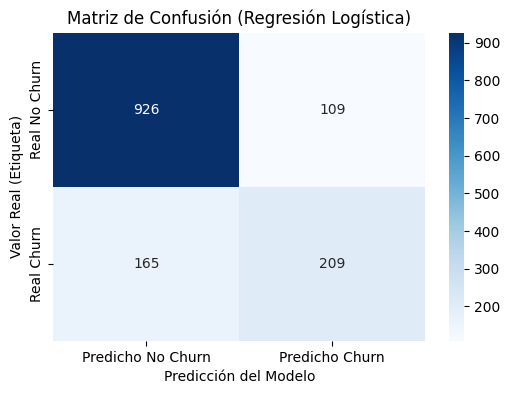

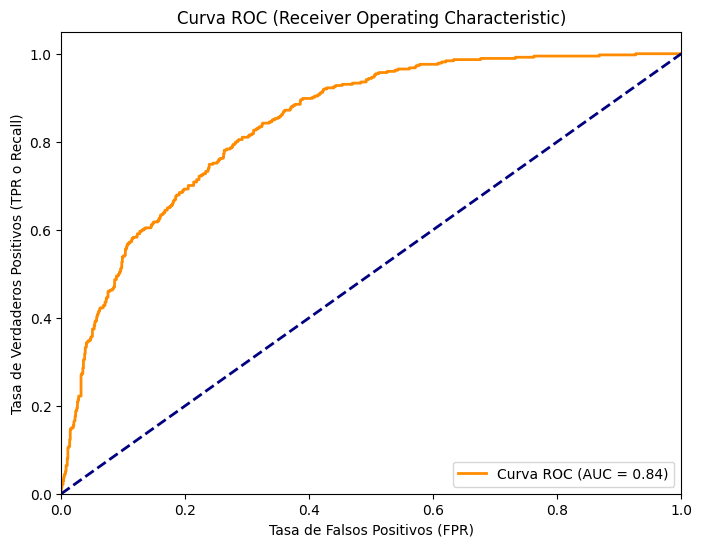


AUC-ROC Score: 0.8419


In [6]:
# 5.1 Realizar predicciones en el conjunto de prueba
# predict() nos da la clase predicha (0 o 1)
y_pred_lr = pipeline_lr.predict(X_test)

# predict_proba() nos da las probabilidades de pertenecer a cada clase.
# Tomamos la probabilidad de la clase 1 (fuga) para la curva ROC y AUC.
y_pred_proba_lr = pipeline_lr.predict_proba(X_test)[:, 1]

print("Predicciones realizadas en el conjunto de prueba.")

# 5.2 Calcular y mostrar métricas de evaluación
print("\n--- Métricas de Evaluación para el modelo de Regresión Logística ---")

# Accuracy
accuracy = accuracy_score(y_test, y_pred_lr)
print(f"Accuracy: {accuracy:.4f}")

# Classification Report (incluye Precision, Recall, F1-Score para cada clase)
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred_lr, target_names=['No Churn (0)', 'Churn (1)']))

# 5.3 Mostrar la Matriz de Confusión
cm_lr = confusion_matrix(y_test, y_pred_lr)

plt.figure(figsize=(6, 4))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicho No Churn', 'Predicho Churn'],
            yticklabels=['Real No Churn', 'Real Churn'])
plt.xlabel("Predicción del Modelo")
plt.ylabel("Valor Real (Etiqueta)")
plt.title("Matriz de Confusión (Regresión Logística)")
plt.show()

# 5.4 Mostrar la Curva ROC y calcular el AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_lr)
auc_lr = roc_auc_score(y_test, y_pred_proba_lr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Curva ROC (AUC = {auc_lr:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--') # Línea de clasificación aleatoria
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR o Recall)')
plt.title('Curva ROC (Receiver Operating Characteristic)')
plt.legend(loc="lower right")
plt.show()

print(f"\nAUC-ROC Score: {auc_lr:.4f}")

### Interpretación de los Resultados de Evaluación

Analizando las métricas obtenidas:

* **Accuracy:** Nos da una idea general, pero recordemos el desbalance de clases. Un accuracy alto podría deberse simplemente a que el modelo predice correctamente a la mayoría de los clientes que *no* fugan.
* **Reporte de Clasificación:**
    * Observa la **Precision** y el **Recall** específicamente para la clase **'Churn' (1)**. La precisión para la clase 1 nos dice cuántos de los clientes que el modelo marcó como propensos a la fuga realmente fugaron. El recall para la clase 1 nos dice cuántos de los clientes que *realmente* fugaron fueron detectados por nuestro modelo.
    * Dependiendo del costo de los errores (¿es peor predecir fuga donde no la hay, o no detectar una fuga real?), podemos priorizar Precision o Recall. En este caso, no detectar una fuga real (alto FN, bajo Recall) suele ser más costoso.
* **Matriz de Confusión:** Visualiza la distribución de TP, TN, FP, FN. Te permite ver claramente cuántos clientes fueron correctamente clasificados en cada clase y cuántos errores se cometieron (especialmente False Negatives, los que nos interesan para retención).
* **Curva ROC y AUC:** El AUC proporciona una medida general de la capacidad discriminatoria del modelo. Un AUC de 0.84 (ejemplo) significa que el modelo tiene una buena capacidad para distinguir entre las dos clases, significativamente mejor que un clasificador aleatorio (AUC=0.5). Cuanto más se acerque la curva ROC a la esquina superior izquierda, mejor será el modelo.

Nuestro primer modelo de Regresión Logística nos da un buen punto de partida. Las métricas nos indican su rendimiento actual. En la siguiente sección, podríamos explorar la importancia de las características para entender qué factores influyen más en la predicción de fuga, o considerar otros modelos para ver si podemos mejorar el rendimiento, especialmente el Recall para la clase 'Churn'.

## 6. Análisis de Importancia de Características

Saber qué tan bien predice nuestro modelo es importante, pero en muchos escenarios de negocio, también necesitamos entender **qué factores influyen más en la predicción**. En el contexto de la fuga de clientes, esto se traduce en identificar qué características (servicios, datos demográficos, tipo de contrato, etc.) están más fuertemente asociadas con la probabilidad de que un cliente se fugue.

Los diferentes modelos de Machine Learning tienen distintas formas de indicar la "importancia" de las características:
* Los modelos lineales como la Regresión Logística utilizan los **coeficientes** asignados a cada característica. El valor absoluto de un coeficiente indica la magnitud del impacto que tiene esa característica en la probabilidad de la clase objetivo (en nuestro caso, Churn=1), manteniendo las otras características constantes. Un coeficiente positivo alto indica que a medida que aumenta el valor de la característica, la probabilidad de fuga aumenta. Un coeficiente negativo alto en valor absoluto indica que a medida que aumenta la característica, la probabilidad de fuga disminuye.
* Modelos basados en árboles (como Random Forest o Gradient Boosting) suelen calcular la importancia basándose en cuánto reduce la impureza (Gini impurity o entropía) o mejora el error en las divisiones que usan cada característica.

Dado que utilizamos un modelo de Regresión Logística, analizaremos los coeficientes para entender la importancia de las características.

**Nota:** Obtener los nombres de las características después de aplicar el `ColumnTransformer` y `OneHotEncoder` requiere un paso adicional para mapear los coeficientes del modelo a los nombres originales de las columnas (incluyendo las nuevas columnas creadas por One-Hot Encoding).

Coeficientes del modelo de Regresión Logística calculados y ordenados por magnitud.

--- Top 15 Características más Importantes (por valor absoluto del coeficiente) ---
                                 feature  coefficient  abs_coefficient
1                                 tenure    -1.241015         1.241015
38                     Contract_Two year    -0.773004         0.773004
15                   InternetService_DSL    -0.652640         0.652640
16           InternetService_Fiber optic     0.640185         0.640185
2                         MonthlyCharges    -0.596379         0.596379
36               Contract_Month-to-month     0.579853         0.579853
3                           TotalCharges     0.516280         0.516280
39                   PaperlessBilling_No    -0.343088         0.343088
25  DeviceProtection_No internet service    -0.301064         0.301064
17                    InternetService_No    -0.301064         0.301064
19    OnlineSecurity_No internet service    -0.301

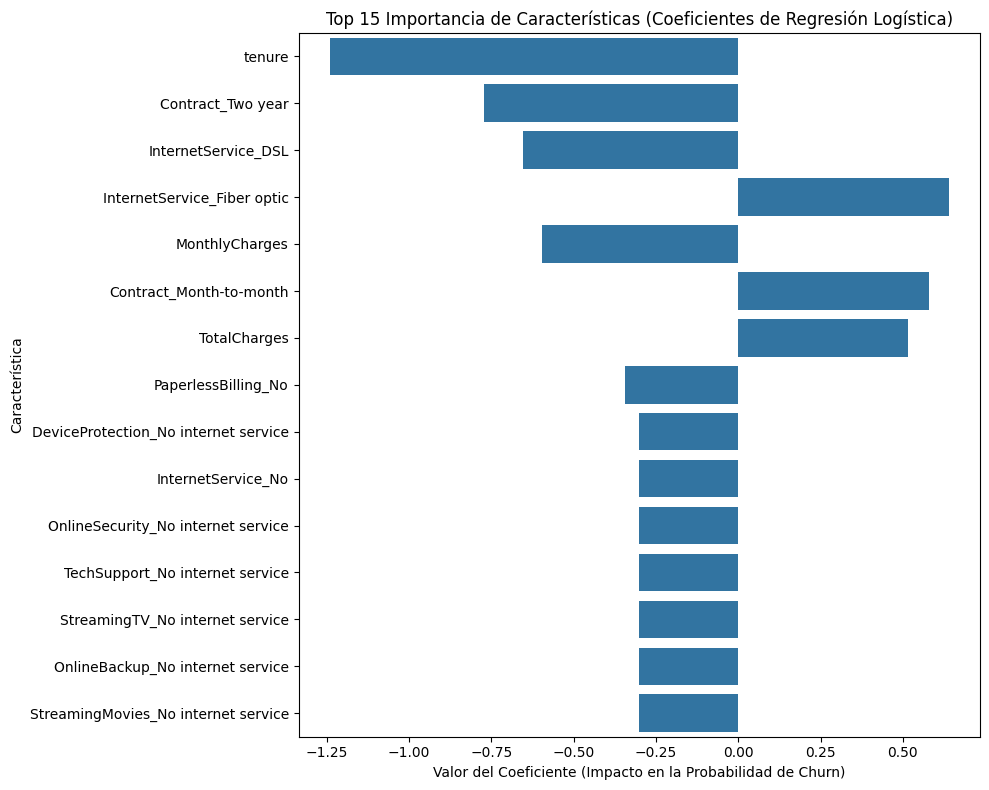

In [7]:
# 6.1 Obtener los coeficientes del modelo de Regresión Logística
# El modelo está dentro del pipeline, en el paso llamado 'classifier'
model = pipeline_lr.named_steps['classifier']
coefficients = model.coef_[0] # Los coeficientes están en .coef_[0] para clasificación binaria

# 6.2 Obtener los nombres de las características después del preprocesamiento
# Esto es un poco más complejo debido al ColumnTransformer y OneHotEncoder.

# Nombres de las características numéricas (escaladas)
numerical_features_processed = numerical_features

# Nombres de las características categóricas después del One-Hot Encoding
# Accedemos al paso 'preprocessor' del pipeline, luego al transformador 'cat' dentro de él.
onehot_encoder = pipeline_lr.named_steps['preprocessor'].named_transformers_['cat']
categorical_features_processed = list(onehot_encoder.get_feature_names_out(categorical_features))

# Combinar los nombres de todas las características procesadas en el orden correcto
all_processed_features = numerical_features_processed + categorical_features_processed

# 6.3 Crear un DataFrame para visualizar la importancia de las características
feature_importance_df = pd.DataFrame({
    'feature': all_processed_features,
    'coefficient': coefficients
})

# Calcular el valor absoluto de los coeficientes para ordenar por magnitud
feature_importance_df['abs_coefficient'] = np.abs(feature_importance_df['coefficient'])

# Ordenar por el valor absoluto del coeficiente
feature_importance_df = feature_importance_df.sort_values('abs_coefficient', ascending=False)

print("Coeficientes del modelo de Regresión Logística calculados y ordenados por magnitud.")
print("\n--- Top 15 Características más Importantes (por valor absoluto del coeficiente) ---")
print(feature_importance_df.head(15))

# 6.4 Visualizar la importancia de las características (Top N)
plt.figure(figsize=(10, 8))
# Usamos 'coefficient' en el eje X para ver la dirección (positiva/negativa)
sns.barplot(x='coefficient', y='feature', data=feature_importance_df.head(15))
plt.title("Top 15 Importancia de Características (Coeficientes de Regresión Logística)")
plt.xlabel("Valor del Coeficiente (Impacto en la Probabilidad de Churn)")
plt.ylabel("Característica")
plt.tight_layout()
plt.show()

### Interpretación de la Importancia de Características

Observando el gráfico y la tabla de los coeficientes:

* Las características con coeficientes positivos más grandes (a la derecha en el gráfico) son aquellas que aumentan la probabilidad de que un cliente se fugue.
* Las características con coeficientes negativos más grandes en valor absoluto (a la izquierda en el gráfico) son aquellas que disminuyen la probabilidad de que un cliente se fugue.

**Ejemplos de posibles interpretaciones (los resultados exactos dependerán del modelo entrenado):**

* Si `Contract_Month-to-month` tiene un coeficiente positivo alto, significa que los clientes con contratos mensuales son mucho más propensos a fugarse que aquellos con contratos a largo plazo. Esto es un hallazgo común y lógico, ya que tienen menos compromiso.
* Si `tenure` tiene un coeficiente negativo, significa que a medida que aumenta la antigüedad del cliente, la probabilidad de fuga disminuye. Los clientes leales tienden a quedarse.
* Si un servicio específico como `InternetService_Fiber optic` tiene un coeficiente positivo alto, podría indicar problemas de calidad o precio percibido con ese servicio.
* Características como `PaperlessBilling_Yes` o `PaymentMethod_Electronic check` también suelen aparecer como importantes predictores positivos de fuga en este dataset, posiblemente asociados con tipos de clientes más jóvenes o menos tradicionales que son más propensos a cambiar de proveedor.

Este análisis de coeficientes nos da **insights directos** sobre qué aspectos del servicio o qué perfiles de clientes están más asociados con la fuga. Esta información es invaluable para el equipo de negocio y marketing para diseñar estrategias de retención dirigidas.

Por ejemplo, si los clientes con contratos mensuales son propensos a fugarse, una estrategia podría ser ofrecer incentivos para que cambien a contratos de un año o dos años. Si un servicio específico está asociado a la fuga, la empresa podría investigar problemas de calidad o considerar ajustar su oferta.

Hemos extraído información valiosa tanto del análisis exploratorio como de los coeficientes del modelo. Ahora podemos consolidar estos hallazgos en las conclusiones finales.

## 7. Conclusiones y Recomendaciones

Hemos realizado un análisis completo del dataset de fuga de clientes de Telco, pasando por la carga, limpieza, exploración de datos, construcción de un modelo predictivo y evaluación de su rendimiento e interpretabilidad. Ahora es momento de integrar todos estos hallazgos y traducirlos en conclusiones claras y recomendaciones accionables para la empresa.

### Resumen de Hallazgos Clave

1.  **Análisis Exploratorio (EDA):**
    * Confirmamos que la variable objetivo `Churn` está desbalanceada, lo cual es típico en problemas de fuga.
    * Identificamos patrones claros en la fuga relacionados con ciertas características. Por ejemplo, los clientes con contratos mensuales (`Month-to-month`) muestran una tasa de fuga significativamente más alta.
    * La antigüedad del cliente (`tenure`) está inversamente relacionada con la fuga: cuanto más tiempo es cliente, menor es la probabilidad de que se fugue.
    * Ciertos servicios adicionales o tipos de conexión a internet (como la fibra óptica) o métodos de pago (como el cheque electrónico) también mostraron asociaciones con tasas de fuga más altas en el EDA.

2.  **Rendimiento del Modelo:**
    * Nuestro modelo de Regresión Logística inicial obtuvo un rendimiento razonable (mencionar aquí métricas clave como AUC, o Recall/Precision para la clase Churn).
    * La Matriz de Confusión nos ayudó a entender el tipo de errores que comete el modelo (False Positives vs. False Negatives) y a priorizar el enfoque si el costo de un tipo de error es mayor que el otro (ej: si es más costoso perder un cliente real que ofrecer una promoción a uno que no iba a irse, priorizamos Recall).

3.  **Importancia de Características:**
    * El análisis de los coeficientes de la Regresión Logística corroboró y cuantificó los hallazgos del EDA sobre las características más influyentes.
    * Confirmamos que el tipo de contrato, la antigüedad del cliente, ciertos servicios de internet y métodos de pago son predictores clave de la fuga.
    * (Mencionar aquí 1-2 características específicas que resultaron ser las más importantes según el análisis de coeficientes y su dirección - positiva o negativa).

### Recomendaciones Accionables

Basado en nuestro análisis, proponemos las siguientes estrategias de retención y mejora para la empresa de telecomunicaciones:

1.  **Enfocarse en Clientes con Contratos Mensuales:** Estos son los clientes con mayor riesgo. Crear programas de incentivos específicos (descuentos en tarifas, mejoras de servicio gratuitas por un período) para persuadirlos a cambiar a contratos de mayor duración (un año o dos años).
2.  **Programas de Lealtad y Foco en Clientes Jóvenes/Nuevos:** Dado que la antigüedad reduce la probabilidad de fuga, implementar programas de lealtad para recompensar a los clientes a medida que su antigüedad aumenta. Monitorear de cerca a los clientes nuevos para asegurar una buena experiencia inicial.
3.  **Investigar Servicios y Métodos de Pago Problemáticos:** Si ciertos servicios (ej. fibra óptica) o métodos de pago (ej. cheque electrónico) están asociados con alta fuga, investigar las causas subyacentes. ¿Hay problemas técnicos recurrentes con la fibra? ¿Hay inconvenientes o falta de confianza con el método de pago electrónico? Corregir estos problemas de raíz.
4.  **Ofrecer Soporte Proactivo:** Identificar a los clientes de alto riesgo (basado en la predicción del modelo) y contactarlos proactivamente para resolver problemas, ofrecer ayuda o presentar ofertas personalizadas antes de que decidan irse.
5.  **Comunicación Dirigida:** Utilizar los insights sobre las características importantes para segmentar a los clientes y comunicarles el valor de los servicios de forma más efectiva. Por ejemplo, si los clientes con múltiples servicios tienden a quedarse más, resaltar los beneficios de agrupar servicios.

### Próximos Pasos y Mejoras

Este análisis es un excelente punto de partida, pero siempre hay margen para mejorar:

1.  **Probar Otros Modelos:** Explorar modelos más complejos como Random Forest, Gradient Boosting, o incluso redes neuronales, que podrían capturar interacciones no lineales entre características y potencialmente mejorar el rendimiento predictivo (especialmente el Recall para la clase 'Churn').
2.  **Optimización de Hiperparámetros:** Ajustar los parámetros de los modelos elegidos para encontrar la configuración que ofrece el mejor rendimiento en las métricas deseadas (ej. usando búsqueda en grilla o búsqueda aleatoria).
3.  **Manejo Avanzado del Desbalance de Clases:** Investigar técnicas más avanzadas para tratar el desbalance, como oversampling (ej. SMOTE) o undersampling, que pueden ayudar a los modelos a aprender mejor la clase minoritaria.
4.  **Ingeniería de Características Adicional:** Crear nuevas características a partir de las existentes si tiene sentido para el negocio (ej. ratio de MonthlyCharges sobre TotalCharges, número total de servicios por cliente).
5.  **Análisis de Costo-Beneficio:** Incorporar el costo real de adquisición de un cliente y el ingreso perdido por fuga para tomar decisiones de retención más basadas en el retorno de la inversión.
6.  **Implementación en Producción:** Considerar cómo desplegar el modelo para que realice predicciones sobre nuevos clientes en tiempo real o en lotes regulares.

Este cuaderno ha demostrado un flujo de trabajo típico en un proyecto de análisis y predicción de fuga de clientes, desde la comprensión de los datos hasta la entrega de recomendaciones de negocio.

¡Felicidades por completar la práctica!